Before test, I first import all `Factory` modules from Stlearn library.

For a typical machine learning task, all we need to do is to initialize the relevant `Factory` object, use it to create the relevant `Data` and `Model` object, finally train and evaulate the `Model` object with `Data` object.

During the initial development, I have provided several classical machine learning and deep learning models, which can be accessed from relevant `Factory` object. They are:
* Linear Regression Model and its data
* Random Forest Regressor Model and its data
* AdaBoost Regressor Model and its data
* Simple Neural Network Model and its data
* CNN Model and its data
* LSTM Model and its data

In [1]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *

# Demo for AdaBoostRegressor

In [2]:
df = AdaBoostRegressorFactory('2018-01-01', '2020-01-01', '2021-01-01', '2021-02-01')
data = df.create_data()
model = df.create_model()

X_train shape: (248391, 152)
y_train shape: (248391,)
X_valid shape: (126123, 152)
y_valid shape: (126123,)
X_test shape: (9478, 152)
y_test shape: (9478,)


In [3]:
model.fit(data)

In [4]:
model.info()

AdaBoostRegressor()


In [5]:
model.evaluate(data)

weighted_mean_squared_error: 0.00174


# Demo for LSTM

In [6]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *

X_train shape: (95656, 60, 152)
y_train shape: (95656,)
X_valid shape: (62144, 60, 152)
y_valid shape: (62144,)
X_test shape: (10976, 60, 152)
y_test shape: (10976,)
Parameters number in model:  11777


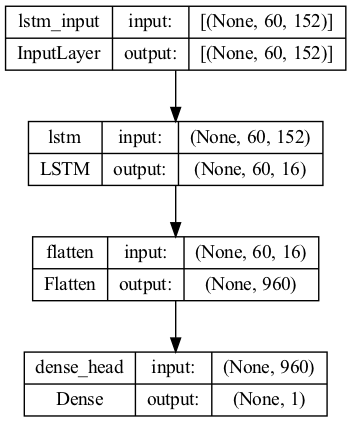

In [7]:
lstmf = LSTMFactory('2019-01-01', '2020-01-01', '2020-07-01', '2020-08-01', 60)
data = lstmf.create_data()
model = lstmf.create_model()
model.info()

Epoch 1/10


2022-11-04 15:24:25.641422: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2990/2990 [==============================] - 32s 10ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - weighted_mean_squared_error: 0.0130 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_weighted_mean_squared_error: 0.0076
Epoch 2/10
2990/2990 [==============================] - 28s 9ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - weighted_mean_squared_error: 0.0041 - val_loss: 0.0029 - val_mean_squared_error: 0.0029 - val_weighted_mean_squared_error: 0.0029
Epoch 3/10
2990/2990 [==============================] - 29s 10ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - weighted_mean_squared_error: 0.0040 - val_loss: 0.0039 - val_mean_squared_error: 0.0039 - val_weighted_mean_squared_error: 0.0039
Epoch 4/10
2990/2990 [==============================] - 28s 9ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - weighted_mean_squared_error: 0.0023 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_weighted_mean_squared_error: 0.0014
Epoch 5/10
2990/2990 [=======

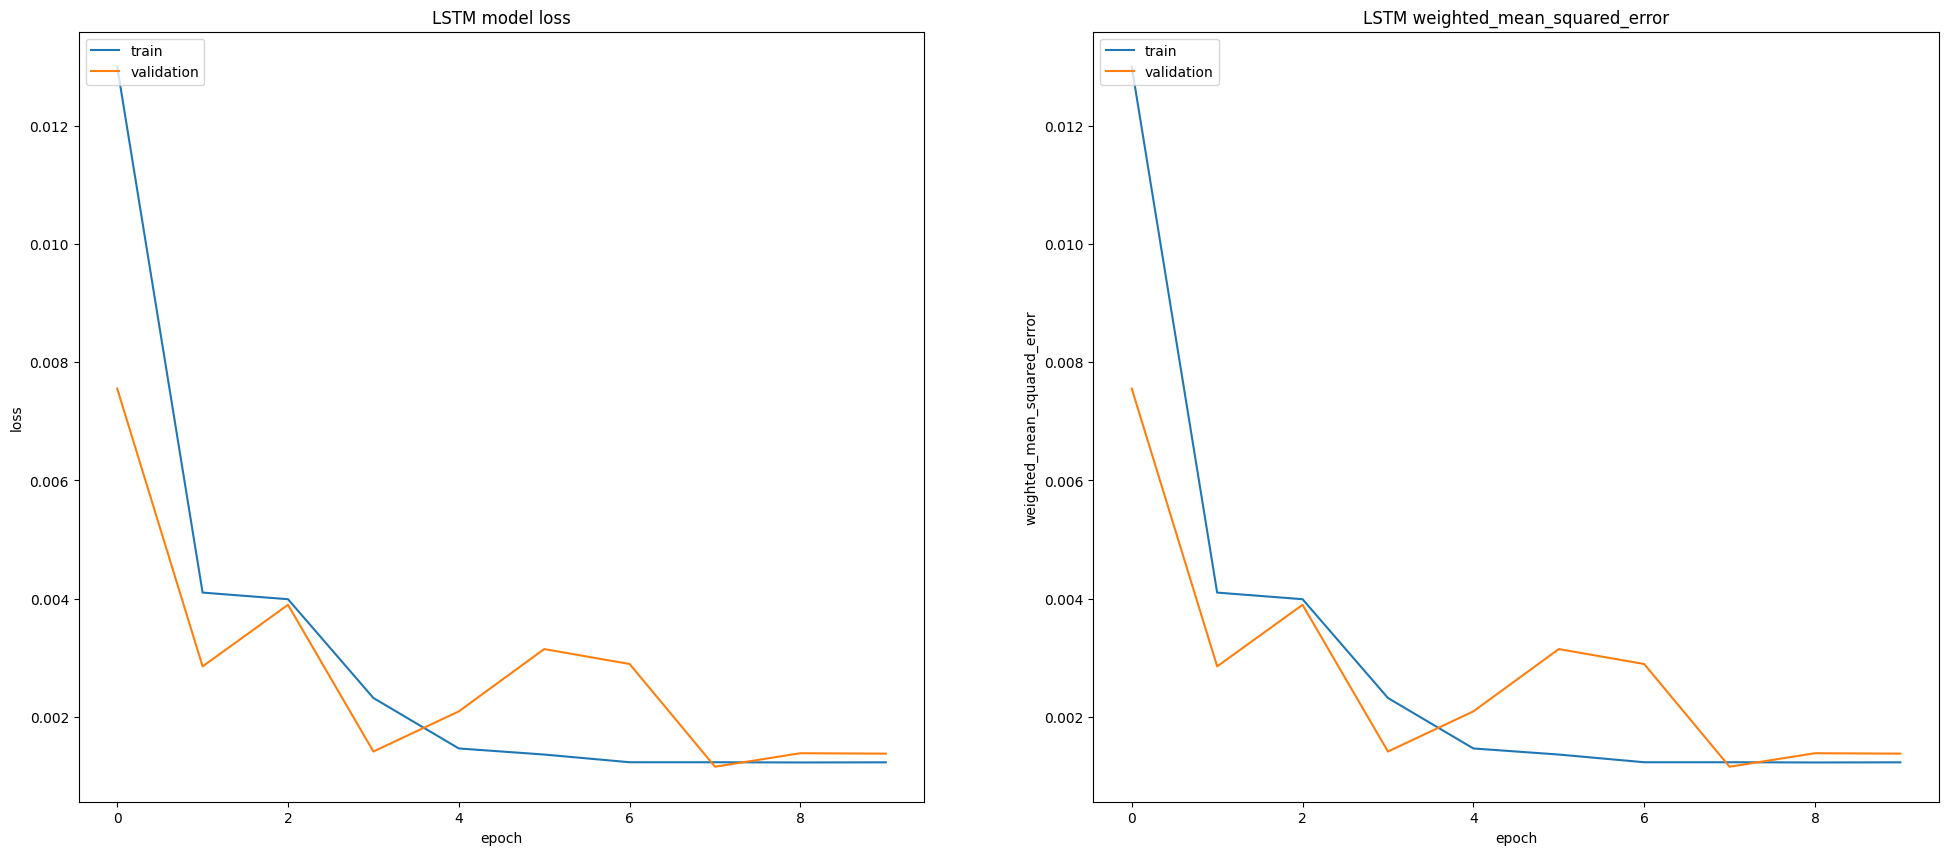

In [8]:
model.fit(data)

In [9]:
model.evaluate(data)

343/343 [==============================] - 1s 2ms/step - loss: 8.1970e-04 - mean_squared_error: 8.1970e-04 - weighted_mean_squared_error: 8.1970e-04
LSTM: Test loss: 0.00082


In [10]:
pred = model.predict(data._X_test)

343/343 [==============================] - 1s 2ms/step


In [13]:
data._ids_test

array([['2020-07-01', 'A', 86.89353942871094, -0.002942068124980657,
        0.0050221328208643],
       ['2020-07-02', 'A', 87.45565795898438, 0.0064690486078611276,
        0.004541250844364],
       ['2020-07-06', 'A', 88.07696533203125, 0.007104255888604305,
        0.0158817258674588],
       ...,
       ['2020-07-29', 'ZTS', 145.5299530029297, 0.01102856293596366,
        0.01242838167815],
       ['2020-07-30', 'ZTS', 147.02877807617188, 0.010299083056888092,
        -0.0037502519373892],
       ['2020-07-31', 'ZTS', 149.56288146972656, 0.017235424429915547,
        0.0076705049901413]], dtype=object)

In [14]:
df = pd.DataFrame([])
df['pred'] = pd.DataFrame(pred)
df[['Date', 'Ticker', 'Close', 'Return', 'Market Return']] = pd.DataFrame(data._ids_test)
df['er'] = pd.DataFrame(data._y_test)

In [15]:
df

,pred,Date,Ticker,Close,Return,Market Return,er
0,0.018295,2020-07-01,A,86.893539,-0.002942,0.005022,0.001928
1,0.018295,2020-07-02,A,87.455658,0.006469,0.004541,-0.008777
2,0.018295,2020-07-06,A,88.076965,0.007104,0.015882,0.009699
3,0.018295,2020-07-07,A,87.97834,-0.00112,-0.010819,-0.004128
4,0.018295,2020-07-08,A,88.303795,0.003699,0.007827,0.009887
...,...,...,...,...,...,...,...
10971,-0.016094,2020-07-27,ZTS,144.869339,0.018721,0.007395,0.000075
10972,-0.016094,2020-07-28,ZTS,143.942474,-0.006398,-0.006473,-0.001400
10973,-0.016094,2020-07-29,ZTS,145.529953,0.011029,0.012428,0.014049
10974,-0.016094,2020-07-30,ZTS,147.028778,0.010299,-0.00375,0.009565


In [16]:
ds = df.groupby('Ticker')['pred'].aggregate(mean='mean', count='count')
ds

,mean,count
Ticker,,
A,0.018295,21
AAL,0.018295,22
AAP,0.012846,22
AAPL,0.018295,22
ABBV,0.018295,22
...,...,...
YUM,-0.016835,22
ZBH,-0.017997,22
ZBRA,0.037226,22


In [19]:
ds = ds[ds['count'] == ds['count'].max()].sort_values('mean')

In [20]:
ds

,mean,count
Ticker,,
TDG,-0.042531,22
RMD,-0.042225,22
NWS,-0.041237,22
WTW,-0.041024,22
WHR,-0.040922,22
...,...,...
TFX,0.038933,22
MTD,0.039369,22
TECH,0.039369,22


In [21]:
short = ds.index[0]
long = ds.index[ds.shape[0] - 1]

In [27]:
df[df['Ticker'] == long][['Date', 'Return']]

,Date,Return
10690,2020-07-01,-0.009596
10691,2020-07-02,0.021068
10692,2020-07-06,0.01924
10693,2020-07-07,-0.014222
10694,2020-07-08,0.006412
10695,2020-07-09,0.015626
10696,2020-07-10,-0.015683
10697,2020-07-13,-0.013736
10698,2020-07-14,0.018512
10699,2020-07-15,0.034036


# Demo for Self Defined Model

Below I demo how to use the library to create an advanced neural network mannually. It is as easy as:
* Derive a subclass from `DlModel`, ovrride its `_create_model()` function to define model
* Derive a subclass from `DlFactory`, override its `_load()` function to define data and model that are going to be returned
* Perform standard client codes to perform deep learning tasks

In [ ]:
class CNNLSTMModel(DlModel):
    def _create_model(self):
        self._model = tf.keras.Sequential([
            tf.keras.layers.Conv1D(25, padding='same', kernel_size=(1,), 
                               activation='relu', input_shape=self._input_shape),
            tf.keras.layers.Conv1D(50, padding='same', kernel_size=(1,), 
                               activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.LSTM(50),
            tf.keras.layers.Dense(1)
        ])
    pass

class CNNLSTMFactory(DlFactory):
    def _load(self):
        super()._load()
        self._model = CNNLSTMModel('CNNLSTM', self._data.get_shape())
    pass

cnnlstmf = CNNLSTMFactory('2010-01-01', '2020-01-01', '2021-01-01', '2021-02-01', 60)
data = cnnlstmf.create_data()
model = cnnlstmf.create_model()
model.info()

In [ ]:
model.fit(data)

In [ ]:
model.evaluate(data)